In [2]:
# Present the table that we analysis
import pandas as pd
df= pd.read_csv('bank.csv', sep=';', header= 0)
pd.DataFrame(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
## Descriptive analysis:

# Education level:
df[df['education']=='primary']
df[df['education']=='secondary']
df[df['education']=='tertiary']
# There are 15% of customers are still in primary school, 2306 in secondary (51%), 1305 in tertiary (30%) and 4% is unknown

# Job
unemployed = df[df['job']=='unemployed'] 
unemployed
df[df['job']=='self-employed'] 
    # There are 128 unemployed customers, account for 3%, 183 self-employed customer, account for 4%
unemployed[unemployed['loan']== 'yes']
    # There are only 13 unemployed customers who can pay their loan, accounted for 10,16% of unemployed
selfemploy= df[df['job']=='self-employed'] # 183
selfemploy[selfemploy['loan']== 'yes']
    # There are 30 self-employed customers who can pay their loan.

# Marital
df[df['marital']=='married'] 
    # There are 2896 customer who have married, account for 64%
    
# Default
df[df['default']=='yes'] # 76
df[df['default']=='no'] # 4445
    # There are 1,7% customers who have defaulted and 98,3% of the customers who don't have defaulted
# Loan
defaulted =df[df['default']=='yes'] 
defaulted[defaulted['loan']=='yes'] # 25
    # There are 25 customers who have defaulted on loan and 51 customers who is defaulted but not on loan 

# For contact:
df[df['contact']=='cellular'] # 2896 customers
df[df['contact']=='telephone'] # 301
df[df['contact']=='unknown'] # 1324
    # There are 64% customers use cellular, 6.6% who use telephone and 29.4% who use unknown device for bank account
    
# For balance: 
df.describe()
    # The average balance of each customer is $1442 with the standard deviation is 3010
    # The highest balance is $71188 and the lowest balance is -$3313.
    
# For duration 
df.describe()
    # On average, the amount of time a customer calls is 264 minutes with the standard deviation is 259.9
    # The longest duration is 3025 minutes long and the fastest call is 4 mins long.

# For days 
df.describe()
    # The average day that each customer makes phone call is 16 days per month with the standard deviation is 8
    # The maximum days is 31 days per month and the minimum is 1 day per month.
# Based on what we analyze in descriptive analysis, also their job conditions, mostly unemployed are unable to pay their loan,
# only 16,4% self-employ's customers can pay their loan 
# -> Customers who have no job tend to be unable to pay for their loan at the bank.


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


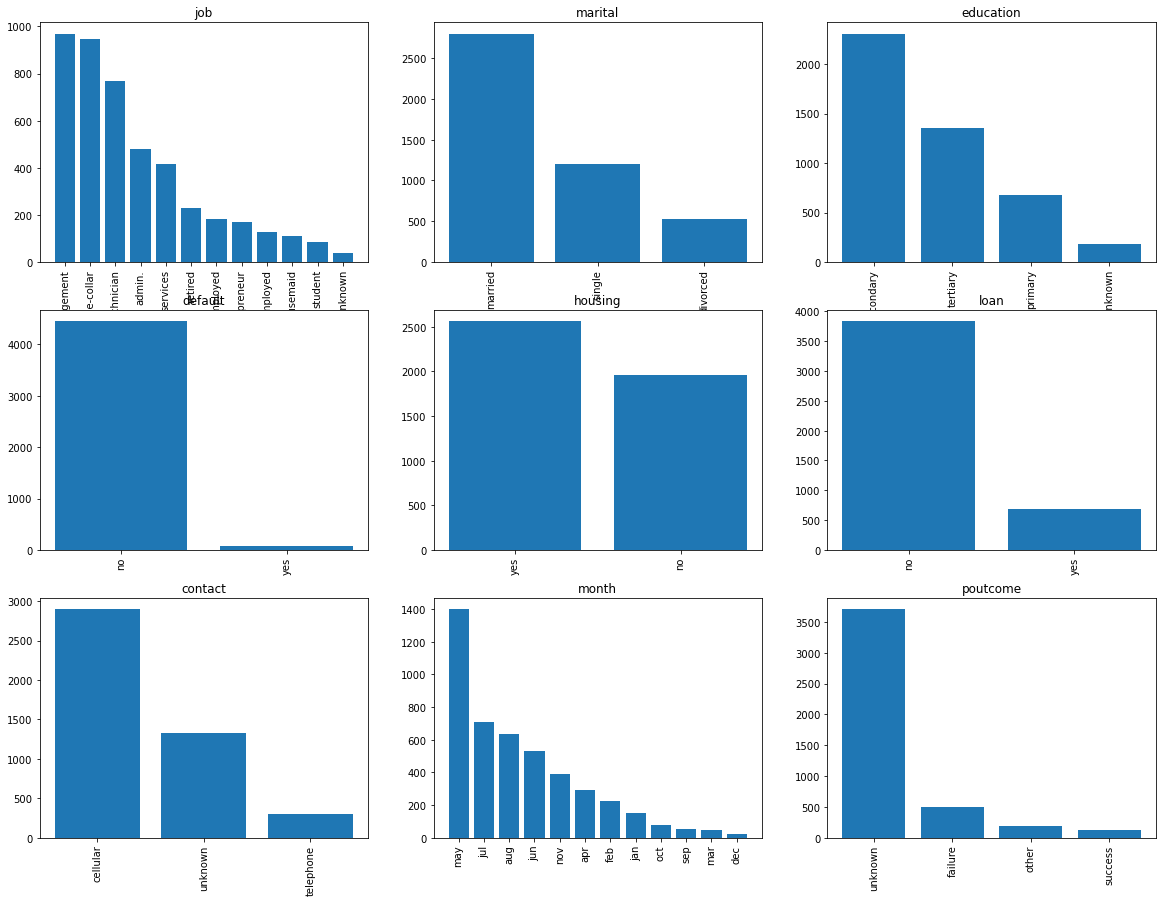

In [9]:
## Try some graphics {bar, pie, line..} if feasible
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()


In [3]:
## Try some graphics {bar, pie, line..} if feasible
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no


In [3]:
## Prescriptive statistics {predict them failing/not failing to repay their loan}:

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4508,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [6]:
loanY= df[df['loan']=='yes']
loanY[loanY['y']=='yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
115,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
259,29,blue-collar,single,secondary,no,482,no,yes,cellular,10,jul,1097,3,-1,0,unknown,yes
271,24,blue-collar,single,secondary,no,174,yes,yes,cellular,18,may,487,1,-1,0,unknown,yes
289,34,admin.,married,tertiary,no,69,no,yes,cellular,4,aug,120,3,1,6,success,yes
298,38,entrepreneur,married,secondary,no,593,yes,yes,cellular,24,jul,1484,24,-1,0,unknown,yes
401,28,blue-collar,single,secondary,no,517,no,yes,cellular,8,jul,681,1,-1,0,unknown,yes
558,41,blue-collar,married,secondary,yes,720,no,yes,cellular,24,jul,651,1,-1,0,unknown,yes
630,30,management,single,tertiary,no,2,yes,yes,cellular,25,jul,1031,8,-1,0,unknown,yes
732,50,management,married,tertiary,no,3463,no,yes,cellular,28,oct,96,1,-1,0,unknown,yes
756,48,management,married,tertiary,no,1167,yes,yes,cellular,1,jun,264,1,-1,0,unknown,yes


In [9]:
df[df['y']=='yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
